In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [2]:
import sys
sys.path.append('../')

In [3]:
from src.environments import centipede_v0
import supersuit as ss
from pettingzoo.utils.conversions import to_parallel

In [4]:
from stable_baselines3.common.monitor import Monitor


In [467]:
env = centipede_v0.env()
#env = rpsls_v1.env()


#env = ss.agent_indicator_v0(env)


Centipede!
{'player_0': Discrete(3), 'player_1': Discrete(3)}


In [489]:
from pettingzoo.utils import random_demo
random_demo(env)


Current moves of: player_0 , NONE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 1, 'player_1': 1}

Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 1, 'player_1': 1}

Current moves of: player_0 , DEFECT
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , DEFECT
Current moves of: player_1 , COOPERATE
rewards {'player_0': 22, 'player_1': 2}

Current moves of: player_1 , COOPERATE
rewards {'player_1': 0}

Average total reward 28.0


28

In [490]:
env = centipede_v0.env()

env = to_parallel(env)

env = ss.pettingzoo_env_to_vec_env_v0(env)
env = ss.concat_vec_envs_v0(env, 1, base_class='stable_baselines3')



Centipede!
{'player_0': Discrete(3), 'player_1': Discrete(3)}


In [491]:
from stable_baselines3.common.monitor import Monitor


In [492]:
from stable_baselines3 import PPO, A2C, DQN

model = PPO('MlpPolicy', 
            env, 
            verbose=3,
            tensorboard_log='tmp/',
            )
model.learn(total_timesteps=2000000)
model.save("policy")

Using cpu device
Logging to tmp/PPO_23
-----------------------------
| time/              |      |
|    fps             | 4032 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 4096 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 2323        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | -0.08199037 |
|    clip_fraction        | 0.595       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.675      |
|    explained_variance   | -0.00127    |
|    learning_rate        | 0.0003      |
|    loss                 | 48          |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0973     |
|    value_loss           | 117         |
-------------------------------------

-------------------------------------------
| time/                   |               |
|    fps                  | 1689          |
|    iterations           | 13            |
|    time_elapsed         | 31            |
|    total_timesteps      | 53248         |
| train/                  |               |
|    approx_kl            | 2.8869603e-05 |
|    clip_fraction        | 0.000391      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00303      |
|    explained_variance   | 0             |
|    learning_rate        | 0.0003        |
|    loss                 | 50.6          |
|    n_updates            | 120           |
|    policy_gradient_loss | -8.56e-05     |
|    value_loss           | 100           |
-------------------------------------------
--------------------------------------
| time/                   |          |
|    fps                  | 1681     |
|    iterations           | 14       |
|    time_elapsed         | 34       |
|    total_ti

---------------------------------------
| time/                   |           |
|    fps                  | 1629      |
|    iterations           | 25        |
|    time_elapsed         | 62        |
|    total_timesteps      | 102400    |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000524 |
|    explained_variance   | 0         |
|    learning_rate        | 0.0003    |
|    loss                 | 50        |
|    n_updates            | 240       |
|    policy_gradient_loss | -2.47e-11 |
|    value_loss           | 100       |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 1626      |
|    iterations           | 26        |
|    time_elapsed         | 65        |
|    total_timesteps      | 106496    |
| train/                  |           |


KeyboardInterrupt: 

In [497]:
r = []

for i in range(100):

    env = centipede_v0.env()

    #env = ss.agent_indicator_v0(env)
    rewards = []
    env.reset()
    for agent in env.agent_iter():
        obs, reward, done, info = env.last()
        rewards.append(reward)
        obs = obs
        print(obs)
        act = model.predict(obs)[0] if not done else None
        env.step(act)
        env.render()
    
    r.append(len(rewards))
rewards

Centipede!
{'player_0': Discrete(3), 'player_1': Discrete(3)}
2
Current moves of: player_0 , DEFECT
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

2
Current moves of: player_0 , DEFECT
Current moves of: player_1 , DEFECT
rewards {'player_0': 20, 'player_1': 0}

0
Current moves of: player_1 , DEFECT
rewards {'player_1': 0}

0
rewards {}

Centipede!
{'player_0': Discrete(3), 'player_1': Discrete(3)}
2
Current moves of: player_0 , DEFECT
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

2
Current moves of: player_0 , DEFECT
Current moves of: player_1 , DEFECT
rewards {'player_0': 20, 'player_1': 0}

0
Current moves of: player_1 , DEFECT
rewards {'player_1': 0}

0
rewards {}

Centipede!
{'player_0': Discrete(3), 'player_1': Discrete(3)}
2
Current moves of: player_0 , DEFECT
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

2
Current moves of: player_0 , DEFECT
Current moves of: player_1 , DEFECT
rewards {'player_0':

Current moves of: player_0 , DEFECT
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

2
Current moves of: player_0 , DEFECT
Current moves of: player_1 , DEFECT
rewards {'player_0': 20, 'player_1': 0}

0
Current moves of: player_1 , DEFECT
rewards {'player_1': 0}

0
rewards {}

Centipede!
{'player_0': Discrete(3), 'player_1': Discrete(3)}
2
Current moves of: player_0 , DEFECT
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

2
Current moves of: player_0 , DEFECT
Current moves of: player_1 , DEFECT
rewards {'player_0': 20, 'player_1': 0}

0
Current moves of: player_1 , DEFECT
rewards {'player_1': 0}

0
rewards {}

Centipede!
{'player_0': Discrete(3), 'player_1': Discrete(3)}
2
Current moves of: player_0 , DEFECT
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

2
Current moves of: player_0 , DEFECT
Current moves of: player_1 , DEFECT
rewards {'player_0': 20, 'player_1': 0}

0
Current moves of: player_1 , DEFECT
rewar

[0, 0, 20, 0]

In [498]:
np.mean(r)

4.0

/home/arjun/anaconda3/envs/rlenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/arjun/anaconda3/envs/rlenv/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

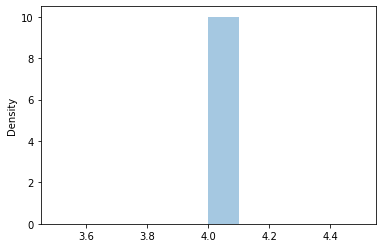

In [499]:
import seaborn as sns

sns.distplot(r)

/home/arjun/anaconda3/envs/rlenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

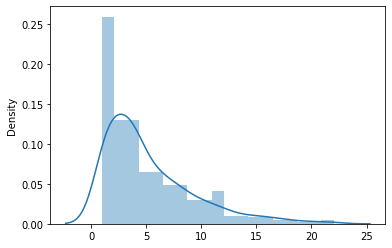

In [285]:
sns.distplot(r)

In [151]:
import sys
sys.path.append('../')

from pettingzoo.test import parallel_api_test
from src.environments import simple_pd_v0

env = dilemma_v0.env()
env = to_parallel(env)

parallel_api_test(env, num_cycles=1)


In [191]:
env = dilemma_v0.env('sd')

#env = ss.agent_indicator_v0(env)
rewards = []
env.reset()

In [227]:

obs, reward, done, info = env.last()
print(obs, reward, done, info)
rewards.append(reward)
act = model.predict(2)[0] if not done else None
env.step(1)
env.render()

1 1 False {}
Current state: Agent1: ANTI_SOCIAL , Agent2: ANTI_SOCIAL
{'player_0': 1, 'player_1': 1}



In [65]:
[0 for n in range(5)]

[0, 0, 0, 0, 0]

In [67]:
np.zeros(4)

array([0., 0., 0., 0.])

In [72]:
import numpy as np

np.random.choice(2,  p=[0.5, 0.5])

1

In [35]:
np.log(1 - 0.1 - 0.9 - 0.1*0.9)

<ipython-input-35-b1cebb2cf1ce>:1: RuntimeWarning: invalid value encountered in log
  np.log(1 - 0.1 - 0.9 - 0.1*0.9)


nan

In [38]:
np.log(0.5)

-0.6931471805599453

In [40]:
1 - 0.1 - 0.9 + 0.1*0.9

0.09000000000000001